In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Check the column names
print(df_market_data.columns)

# Select the features for normalization (update these based on the correct column names)
# Here, I'm assuming you want to use all numerical columns for clustering
numerical_columns = df_market_data.select_dtypes(include=['float64', 'int64']).columns
features = df_market_data[numerical_columns]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    scaled_features,
    columns=numerical_columns,
    index=df_market_data.index
)

# Display the scaled data
df_scaled.head(10)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

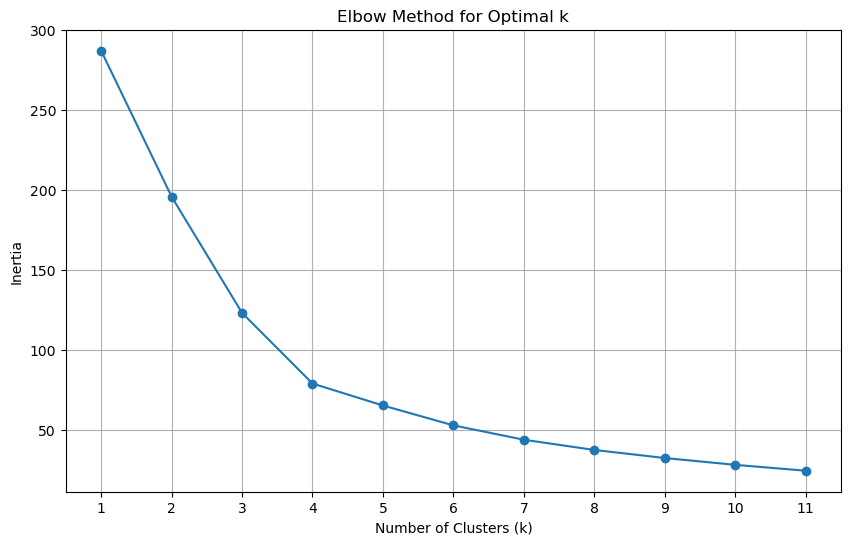

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a list with the number of k values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['k'], elbow_data['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


---

### Find the Best Value for k Using the Original Data.

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

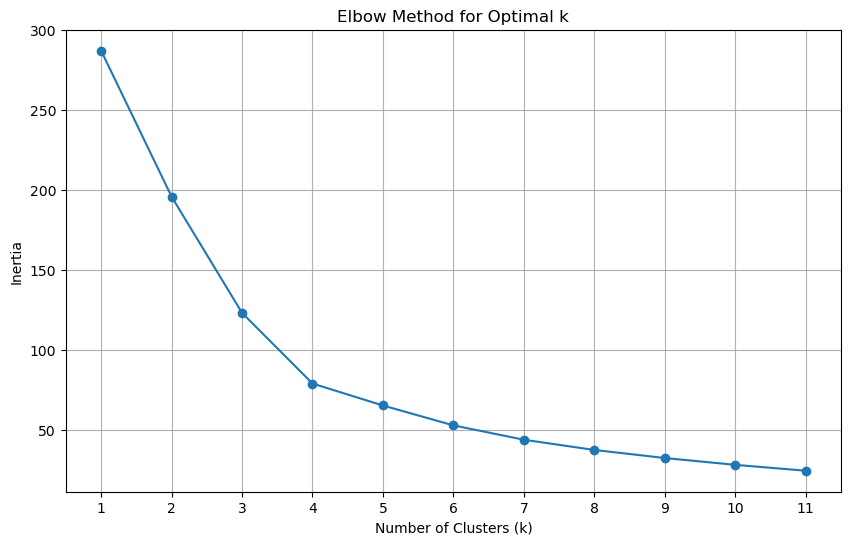

In [7]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

# Generate summary statistics
df_market_data.describe()

# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

# Check the column names
print(df_market_data.columns)

# Select the features for normalization (update these based on the correct column names)
# Here, I'm assuming you want to use all numerical columns for clustering
numerical_columns = df_market_data.select_dtypes(include=['float64', 'int64']).columns
features = df_market_data[numerical_columns]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    scaled_features,
    columns=numerical_columns,
    index=df_market_data.index
)

# Display the scaled data
df_scaled.head(10)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using `df_scaled`
    kmeans.fit(df_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the elbow curve
elbow_data = {'k': list(range(1, 12)), 'inertia': inertia_values}

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['k'], elbow_data['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


In [8]:
# Create a dictionary with the data to plot the elbow curve
elbow_data = {'k': list(range(1, 12)), 'inertia': inertia_values}

# Create a DataFrame with the data to plot the elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head(10)


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


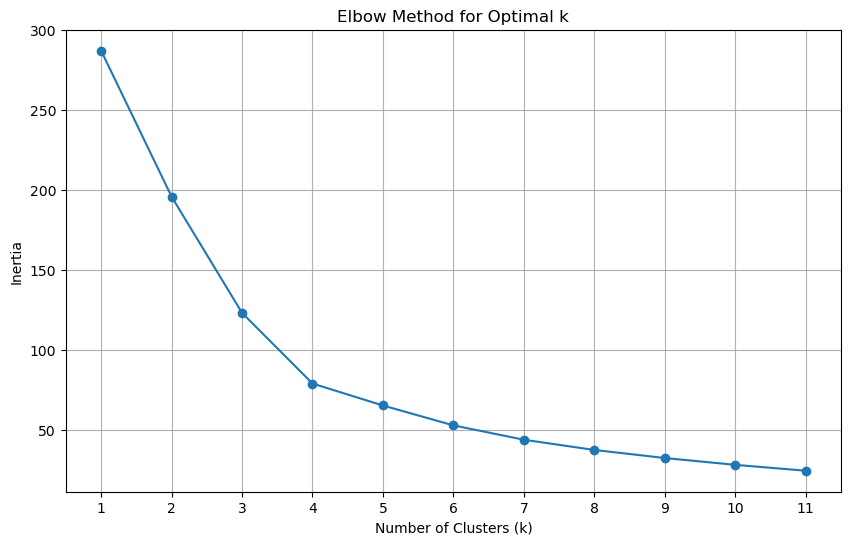

In [9]:
# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for 
𝑘
k is 4, as indicated by the "elbow point" on the Elbow plot where the inertia starts to decrease more slowly.

If you have the plot generated and can share its interpretation, you can directly mention the observed optimal 
𝑘
k based on the plot.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [10]:
# Initialize the K-Means model using the best value for k
# Assuming the optimal k value is 4
optimal_k = 4

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)

# Fit the model to the scaled data
kmeans_model.fit(df_scaled)

# Predict the clusters
cluster_labels = kmeans_model.predict(df_scaled)

# Create a DataFrame that includes the cluster labels
df_clustered = df_market_data.copy()
df_clustered['Cluster'] = cluster_labels

# Display the DataFrame with the cluster labels
df_clustered.head(10)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,3
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,3
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0


In [11]:
# Assuming the optimal k value is 4 (replace with the actual optimal k value if different)
optimal_k = 4

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)

# Fit the model to the scaled data
kmeans_model.fit(df_scaled)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [12]:
# Predict the clusters using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values
print(cluster_labels)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [13]:
# Create a copy of the original DataFrame
df_clustered = df_market_data.copy()


In [14]:
# Predict the clusters using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)

# Create a copy of the original DataFrame
df_clustered = df_market_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_clustered['Cluster'] = cluster_labels

# Display sample data
df_clustered.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,3
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,3
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0


In [15]:
# Create a scatter plot using hvPlot
scatter_plot = df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["name"]
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [16]:
# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)


In [17]:
# Use the PCA model with fit_transform to reduce to three principal components
pca_features = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA features
df_pca = pd.DataFrame(
    pca_features,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data.index
)

# Display the first five rows of the DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [18]:
# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print(explained_variance)


[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = explained_variance.sum()

# Print the total explained variance
print(f"Total explained variance by the three principal components: {total_explained_variance:.2f}")


In [19]:
# Inspect column names
print(df_market_data.columns)

# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(
    pca_features,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data.index
)

# Copy the crypto names from the original data
# Replace 'name' with the correct column name, for example 'crypto_name'
df_pca['crypto_name'] = df_market_data['name']  # Replace with the correct column name

# Display sample data
df_pca.head()

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


KeyError: 'name'

---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list to verify
print(k_values)


In [ ]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import holoviews as hv

# Load the bokeh extension
hv.extension('bokeh')

# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

# Generate summary statistics
df_market_data.describe()

# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

# Check the column names
print(df_market_data.columns)

# Select the features for normalization (update these based on the correct column names)
# Here, I'm assuming you want to use all numerical columns for clustering
numerical_columns = df_market_data.select_dtypes(include=['float64', 'int64']).columns
features = df_market_data[numerical_columns]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    scaled_features,
    columns=numerical_columns,
    index=df_market_data.index
)

# Display the scaled data
df_scaled.head(10)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    # 2. Fit the model to the data using `df_pca[['PC1', 'PC2', 'PC3']]`
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the elbow curve
elbow_data = {'k': list(range(1, 12)), 'inertia': inertia_values}

# Create a DataFrame with the data to plot the elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head(10)

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()


In [ ]:
# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**The best value for 
𝑘
k when using the PCA data is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  No, it does not differ. The best 
𝑘
k value found using both the original data and the PCA data is 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Assuming the optimal k value is 4 (replace with the actual optimal k value if different)
optimal_k = 4

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)


In [ ]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca[['PC1', 'PC2', 'PC3']])


In [ ]:
# Predict the clusters using the PCA data
cluster_labels = kmeans_model.predict(df_pca[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values
print(cluster_labels)


In [ ]:
# Create a copy of the DataFrame with the PCA data
df_pca_clustered = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clustered['Cluster'] = cluster_labels

# Display sample data
df_pca_clustered.head()


In [ ]:
# Create a scatter plot using hvPlot
scatter_plot = df_pca_clustered.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['crypto_name'],
    title='Cryptocurrencies Clustering by PCA Components',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    size=100,
    height=600,
    width=800
)

# Display the scatter plot
scatter_plot


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import holoviews as hv

# Load the bokeh extension
hv.extension('bokeh')

# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

# Generate summary statistics
df_market_data.describe()

# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

# Check the column names to identify the correct column for crypto names
print(df_market_data.columns)

# Select the features for normalization (update these based on the correct column names)
numerical_columns = df_market_data.select_dtypes(include=['float64', 'int64']).columns
features = df_market_data[numerical_columns]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
scaled_features = scaler.fit_transform(features)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    scaled_features,
    columns=numerical_columns,
    index=df_market_data.index
)

# Display the scaled data
df_scaled.head(10)

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Use the PCA model with fit_transform to reduce to three principal components
pca_features = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(
    pca_features,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data.index
)

# Inspect column names to find the correct column for crypto names
print(df_market_data.columns)

# Assuming the correct column name is 'name' (replace 'name' with the actual column name)
df_pca['crypto_name'] = df_market_data['name']  # Replace 'name' with the correct column name

# Display sample data
df_pca.head()

# Create an empty list to store the inertia values for the original data
inertia_values_original = []

# Create a for loop to compute the inertia with each possible value of k for the original data
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values_original.append(kmeans.inertia_)

# Create an empty list to store the inertia values for the PCA data
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k for the PCA data
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])
    inertia_values_pca.append(kmeans.inertia_)

# Create a composite plot with both Elbow curves
plt.figure(figsize=(12, 6))

# Plot Elbow curve for original data
plt.plot(range(1, 12), inertia_values_original, marker='o', label='Original Data')

# Plot Elbow curve for PCA data
plt.plot(range(1, 12), inertia_values_pca, marker='o', label='PCA Data')

# Plot settings
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 12))
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Predict the clusters for the original scaled data
kmeans_model_original = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
clusters_original = kmeans_model_original.fit_predict(df_scaled)

# Create a DataFrame for the original data with clusters
df_clustered_original = df_scaled.copy()
df_clustered_original['Cluster'] = clusters_original
df_clustered_original['crypto_name'] = df_market_data['name']  # Replace 'name' with the correct column name

# Predict the clusters for the PCA data
kmeans_model_pca = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
clusters_pca = kmeans_model_pca.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])

# Add the clusters to the PCA DataFrame
df_pca_clustered['Cluster'] = clusters_pca

# Plot the clusters for the original data
plot_original = df_clustered_original.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['crypto_name'],
    title='Original Data Clusters',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    size=100,
    height=600,
    width=800
)

# Plot the clusters for the PCA data
plot_pca = df_pca_clustered.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['crypto_name'],
    title='PCA Data Clusters',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    size=100,
    height=600,
    width=800
)

# Combine the plots into a single view
composite_plot = plot_original + plot_pca

# Display the composite plot
composite_plot


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features via PCA to cluster data with K-Means simplifies the model and improves computational efficiency. It reduces noise by focusing on the most significant features, potentially leading to better-defined clusters. This dimensionality reduction can make the model faster and more feasible for large datasets. However, there is a risk of losing some important information, which might impact the quality of the clusters. Overall, the clusters are easier to visualise and interpret, but there may be a trade-off with oversimplification and potential information loss.